In [1025]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
data=pd.read_csv('student-data.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [1026]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [1027]:
data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

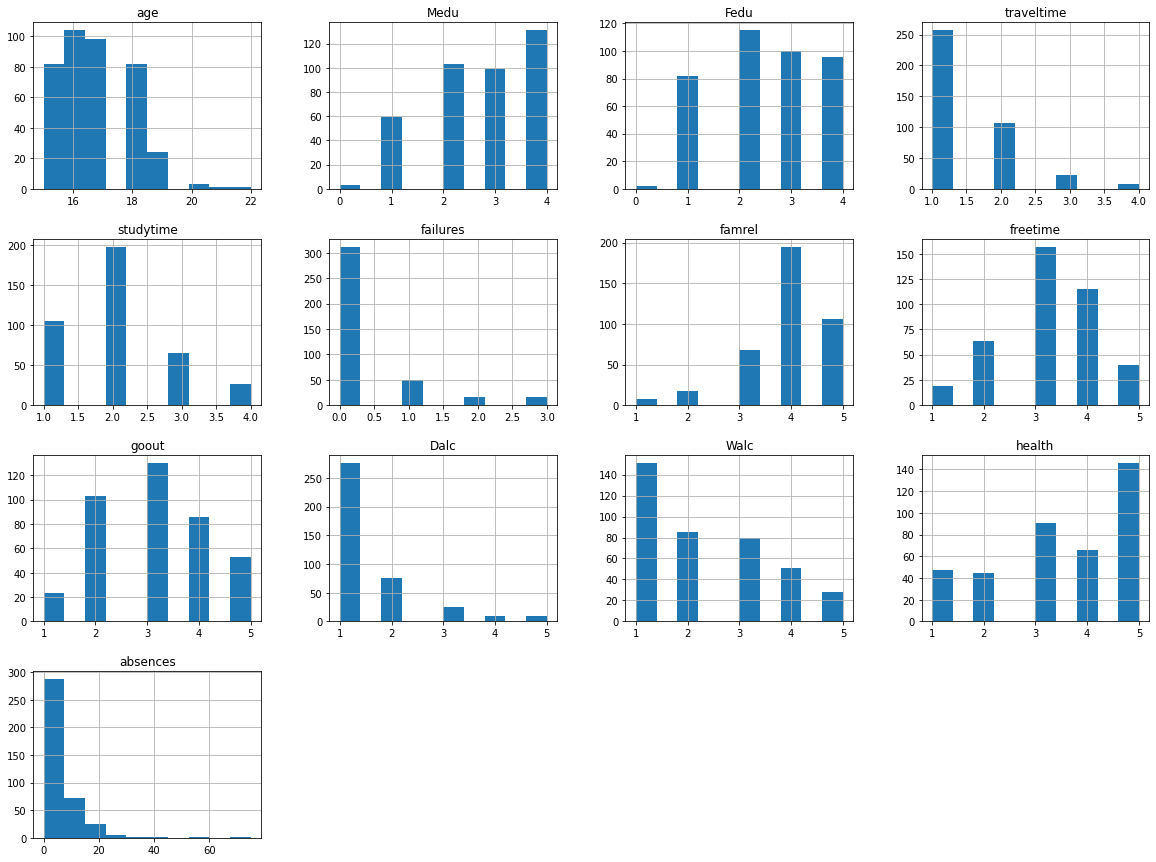

In [1028]:
fregraph=data.select_dtypes(include=["int64"])
fregraph.hist(figsize=(20,15))
plt.show()

In [1029]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [1030]:
x=data.drop(['sex','age','address','famsize','guardian','nursery','romantic'],axis=1)
y=pd.DataFrame(data['passed'])

In [1031]:
x['passed_e']=label_en.fit_transform(x['passed'])

In [1032]:
x=x.drop(['passed'],axis=1)

In [1033]:
x

,school,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,passed_e
0,GP,A,4,4,at_home,teacher,course,2,2,0,...,yes,no,4,3,4,1,1,3,6,0
1,GP,T,1,1,at_home,other,course,1,2,0,...,yes,yes,5,3,3,1,1,3,4,0
2,GP,T,1,1,at_home,other,other,1,2,3,...,yes,yes,4,3,2,2,3,3,10,1
3,GP,T,4,2,health,services,home,1,3,0,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,T,3,3,other,other,home,1,2,0,...,yes,no,4,3,2,1,2,5,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,A,2,2,services,services,course,1,2,2,...,yes,no,5,5,4,4,5,4,11,0
391,MS,T,3,1,services,services,course,2,1,0,...,yes,yes,2,4,5,3,4,2,3,1
392,MS,T,1,1,other,other,course,1,1,3,...,yes,no,5,5,3,3,3,3,3,0
393,MS,T,3,2,services,other,course,3,1,0,...,yes,yes,4,4,1,3,4,5,0,1


In [1034]:
x.value_counts("Mjob")

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
dtype: int64

In [1035]:
x.value_counts("Fjob")

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
dtype: int64

In [1036]:
x.value_counts("reason")

reason
course        145
home          109
reputation    105
other          36
dtype: int64

# Perform Label Encodin

In [1037]:
#Encoding Mjob

In [1038]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Mjob']
for i in np.arange(len(a)):
    x[a[i]]=label_en.fit_transform(x[a[i]])

In [1039]:
x.head()

,school,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,passed_e
0,GP,A,4,4,0,teacher,course,2,2,0,...,yes,no,4,3,4,1,1,3,6,0
1,GP,T,1,1,0,other,course,1,2,0,...,yes,yes,5,3,3,1,1,3,4,0
2,GP,T,1,1,0,other,other,1,2,3,...,yes,yes,4,3,2,2,3,3,10,1
3,GP,T,4,2,1,services,home,1,3,0,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,T,3,3,2,other,home,1,2,0,...,yes,no,4,3,2,1,2,5,4,1


In [1040]:
#Encoding Fjob

In [1041]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['Fjob']
for i in np.arange(len(a)):
    x[a[i]]=label_en.fit_transform(x[a[i]])

In [1042]:
x.head()

,school,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,passed_e
0,GP,A,4,4,0,4,course,2,2,0,...,yes,no,4,3,4,1,1,3,6,0
1,GP,T,1,1,0,2,course,1,2,0,...,yes,yes,5,3,3,1,1,3,4,0
2,GP,T,1,1,0,2,other,1,2,3,...,yes,yes,4,3,2,2,3,3,10,1
3,GP,T,4,2,1,3,home,1,3,0,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,T,3,3,2,2,home,1,2,0,...,yes,no,4,3,2,1,2,5,4,1


In [1043]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['reason']
for i in np.arange(len(a)):
    x[a[i]]=label_en.fit_transform(x[a[i]])

In [1044]:
x.head()

,school,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,...,higher,internet,famrel,freetime,goout,Dalc,Walc,health,absences,passed_e
0,GP,A,4,4,0,4,0,2,2,0,...,yes,no,4,3,4,1,1,3,6,0
1,GP,T,1,1,0,2,0,1,2,0,...,yes,yes,5,3,3,1,1,3,4,0
2,GP,T,1,1,0,2,2,1,2,3,...,yes,yes,4,3,2,2,3,3,10,1
3,GP,T,4,2,1,3,1,1,3,0,...,yes,yes,3,2,2,1,1,5,2,1
4,GP,T,3,3,2,2,1,1,2,0,...,yes,no,4,3,2,1,2,5,4,1


In [1045]:
#One hot encoding "Pstatus"

In [1046]:
Pstatus_en=pd.get_dummies(x['Pstatus'])

In [1047]:
x=pd.concat([x,Pstatus_en],axis=1)

In [1048]:
x.head()

,school,Pstatus,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,...,famrel,freetime,goout,Dalc,Walc,health,absences,passed_e,A,T
0,GP,A,4,4,0,4,0,2,2,0,...,4,3,4,1,1,3,6,0,1,0
1,GP,T,1,1,0,2,0,1,2,0,...,5,3,3,1,1,3,4,0,0,1
2,GP,T,1,1,0,2,2,1,2,3,...,4,3,2,2,3,3,10,1,0,1
3,GP,T,4,2,1,3,1,1,3,0,...,3,2,2,1,1,5,2,1,0,1
4,GP,T,3,3,2,2,1,1,2,0,...,4,3,2,1,2,5,4,1,0,1


In [1049]:
x=x.drop(["Pstatus"],axis=1)

In [1050]:
x.head()

,school,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,passed_e,A,T
0,GP,4,4,0,4,0,2,2,0,yes,...,4,3,4,1,1,3,6,0,1,0
1,GP,1,1,0,2,0,1,2,0,no,...,5,3,3,1,1,3,4,0,0,1
2,GP,1,1,0,2,2,1,2,3,yes,...,4,3,2,2,3,3,10,1,0,1
3,GP,4,2,1,3,1,1,3,0,no,...,3,2,2,1,1,5,2,1,0,1
4,GP,3,3,2,2,1,1,2,0,no,...,4,3,2,1,2,5,4,1,0,1


In [1051]:
x=x.drop(["school"],axis=1)

In [1052]:
x.head()

,Medu,Fedu,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,passed_e,A,T
0,4,4,0,4,0,2,2,0,yes,no,...,4,3,4,1,1,3,6,0,1,0
1,1,1,0,2,0,1,2,0,no,yes,...,5,3,3,1,1,3,4,0,0,1
2,1,1,0,2,2,1,2,3,yes,no,...,4,3,2,2,3,3,10,1,0,1
3,4,2,1,3,1,1,3,0,no,yes,...,3,2,2,1,1,5,2,1,0,1
4,3,3,2,2,1,1,2,0,no,yes,...,4,3,2,1,2,5,4,1,0,1


# Feature Engineering

In [1053]:
#Combining mothers n fathers education

x['Parent_edu']=x['Medu']+x['Fedu']

In [1054]:
x=x.drop(['Medu','Fedu'],axis=1)

In [1055]:
#Combining Alcohol consumption in week days and weekend

x['Alc']=x['Dalc']+x['Walc']

In [1056]:
x=x.drop(['Dalc','Walc'],axis=1)

In [1057]:
#Combining freetime and goout to Freetime

x['Freetime']=x['freetime']+x['goout']

In [1058]:
x=x.drop(['freetime','goout'],axis=1)

In [1059]:
x.head()

,Mjob,Fjob,reason,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,internet,famrel,health,absences,passed_e,A,T,Parent_edu,Alc,Freetime
0,0,4,0,2,2,0,yes,no,no,no,...,no,4,3,6,0,1,0,8,2,7
1,0,2,0,1,2,0,no,yes,no,no,...,yes,5,3,4,0,0,1,2,2,6
2,0,2,2,1,2,3,yes,no,yes,no,...,yes,4,3,10,1,0,1,2,5,5
3,1,3,1,1,3,0,no,yes,yes,yes,...,yes,3,5,2,1,0,1,6,2,4
4,2,2,1,1,2,0,no,yes,yes,no,...,no,4,5,4,1,0,1,6,3,5


In [1060]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Mjob        395 non-null    int32 
 1   Fjob        395 non-null    int32 
 2   reason      395 non-null    int32 
 3   traveltime  395 non-null    int64 
 4   studytime   395 non-null    int64 
 5   failures    395 non-null    int64 
 6   schoolsup   395 non-null    object
 7   famsup      395 non-null    object
 8   paid        395 non-null    object
 9   activities  395 non-null    object
 10  higher      395 non-null    object
 11  internet    395 non-null    object
 12  famrel      395 non-null    int64 
 13  health      395 non-null    int64 
 14  absences    395 non-null    int64 
 15  passed_e    395 non-null    int32 
 16  A           395 non-null    uint8 
 17  T           395 non-null    uint8 
 18  Parent_edu  395 non-null    int64 
 19  Alc         395 non-null    int64 
 20  Freetime  

In [1061]:
x['schoolsup']= label_en.fit_transform(x['schoolsup'])
x['famsup']= label_en.fit_transform(x['famsup'])
x['paid']= label_en.fit_transform(x['paid'])
x['activities']= label_en.fit_transform(x['activities'])
x['higher']= label_en.fit_transform(x['higher'])
x['internet']= label_en.fit_transform(x['internet'])

In [1062]:
x=x.drop(['schoolsup','paid','activities','higher','internet','famsup'],axis=1)

In [1063]:
x.head()

,Mjob,Fjob,reason,traveltime,studytime,failures,famrel,health,absences,passed_e,A,T,Parent_edu,Alc,Freetime
0,0,4,0,2,2,0,4,3,6,0,1,0,8,2,7
1,0,2,0,1,2,0,5,3,4,0,0,1,2,2,6
2,0,2,2,1,2,3,4,3,10,1,0,1,2,5,5
3,1,3,1,1,3,0,3,5,2,1,0,1,6,2,4
4,2,2,1,1,2,0,4,5,4,1,0,1,6,3,5


In [1064]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Mjob        395 non-null    int32
 1   Fjob        395 non-null    int32
 2   reason      395 non-null    int32
 3   traveltime  395 non-null    int64
 4   studytime   395 non-null    int64
 5   failures    395 non-null    int64
 6   famrel      395 non-null    int64
 7   health      395 non-null    int64
 8   absences    395 non-null    int64
 9   passed_e    395 non-null    int32
 10  A           395 non-null    uint8
 11  T           395 non-null    uint8
 12  Parent_edu  395 non-null    int64
 13  Alc         395 non-null    int64
 14  Freetime    395 non-null    int64
dtypes: int32(4), int64(9), uint8(2)
memory usage: 34.8 KB


In [1065]:
y=pd.DataFrame(x['passed_e'])

In [1066]:
x=x.drop(['passed_e'],axis=1)

# Splitting the dataset

In [1067]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [1068]:
x_train.shape

(276, 14)

In [1069]:
y_train.shape

(276, 1)

In [1070]:
x_test.shape

(119, 14)

In [1071]:
y_test.shape

(119, 1)

# Modeling

In [1072]:
#KNN

In [1073]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix

In [1074]:
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [1075]:
acc_values

[0.6554621848739496,
 0.6218487394957983,
 0.6890756302521008,
 0.6974789915966386,
 0.7058823529411765,
 0.6974789915966386,
 0.7058823529411765,
 0.7142857142857143,
 0.6974789915966386,
 0.6554621848739496,
 0.6638655462184874,
 0.680672268907563]

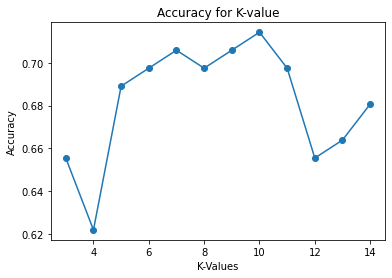

In [1076]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [1077]:
classifier= KNeighborsClassifier(n_neighbors=10,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [1078]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))

accuracy score: 0.7310924369747899
f1 score is: 0.8241758241758242
Precision is: 0.7352941176470589
Recall is: 0.9375


In [1079]:
confusion_matrix(y_test,y_pred)

array([[12, 27],
       [ 5, 75]], dtype=int64)

In [1080]:
#Random Forest

In [1081]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

In [1082]:
confusion_matrix(y_test,y_pred)

array([[12, 27],
       [ 8, 72]], dtype=int64)

In [1083]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))

accuracy score: 0.7058823529411765
f1 score is: 0.8044692737430167
Precision is: 0.7272727272727273
Recall is: 0.9


In [1084]:
#lOGISTIC REGRESSION

In [1085]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_pred= log_model.predict(x_test)

In [1086]:
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score is:",f1_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred))
print("Recall is:",recall_score(y_test,y_pred))

accuracy score: 0.7310924369747899
f1 score is: 0.8241758241758242
Precision is: 0.7352941176470589
Recall is: 0.9375


In [1087]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[12, 27],
       [ 5, 75]], dtype=int64)